**TASK 4- SALES PREDICTION USING PYTHON BY MITUL PRAJAPATI**

**In this project, we aimed to predict sales based on advertising expenditures in different media, including TV, Radio, and Newspaper**

**IMPORTING IMPORTANT LIBRARIES**

In [34]:
import numpy as np
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings('ignore')

**IMPORTING DATA** 

In [35]:
df=pd.read_csv("D:/MITUL/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [36]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


**EDA**

In [37]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


On average, the spending on TV is the highest (147.04), followed by Newspaper (30.55) and Radio (23.26).
The max Sales is 27, and min sales is 1.60.

In [38]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [39]:
df.shape

(200, 4)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


This data is already clean, it doesn't contain any null value.

**VISUALIZATION OF SALES WRT DIFFERENT ADVERTISING PLATFORMS USING HEATMAP**

<Axes: >

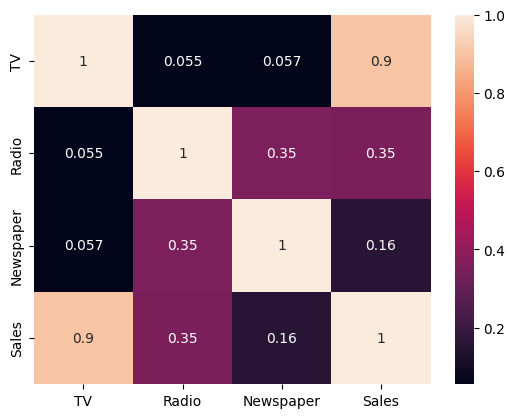

In [41]:
sb.heatmap(df.corr(),annot=True)

TV and sales are highly correlated.

**VISUALIZATION OF SALES WRT DIFFERENT ADVERTISING PLATFORM USING SCATTER PLOT**

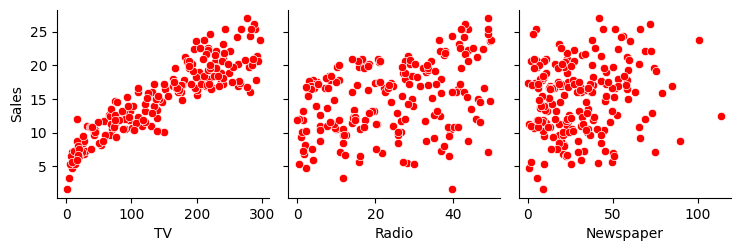

In [42]:
sb.pairplot(df, x_vars=['TV','Radio','Newspaper'],y_vars='Sales',plot_kws={'color':'red'})

From this scatter plot we can see that only 'TV' make a positive correlation with 'sales', 'radio' and 'newspaper' doesn't make any perfect relation with 'sales'.

**SPLITTING THE DATASET INTO TRAIN TEST DATA, WITH TEST SIZE=0.3, BY USING SKLEARN.MODEL_SELECTION**

In [43]:
x=df[['TV']]
y=df[['Sales']]

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [45]:
X_train.head()

,TV
131,265.2
96,197.6
181,218.5
19,147.3
153,171.3


In [46]:
y_train.head()

,Sales
131,17.7
96,16.7
181,17.2
19,14.6
153,16.0


In [47]:
X_test.head()

,TV
18,69.2
170,50.0
107,90.4
98,289.7
177,170.2


**FITTING THE X,Y TRAIN DATA, USING LINEARREGRESSION**

In [48]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(X_train,y_train)

LinearRegression()

In [49]:
predict=lin.predict(X_test)
print(f"first 10 values:\n{predict[:10]}")

first 10 values:
[[10.93127621]
 [ 9.88042193]
 [12.09159447]
 [22.99968079]
 [16.45920756]
 [10.21976029]
 [ 7.6199906 ]
 [20.28497391]
 [ 8.4464437 ]
 [17.95886418]]


This is the required predicted value for y_test.

In [50]:
lin.coef_
# from equation(y=mx+c), m = coef_ 

array([[0.05473199]])

In [51]:
lin.intercept_
# from equation(y=mx+c), c = intercept_

array([7.14382225])

In [52]:
y_test_predict=0.05473199*69.2+7.14382225
y_test_predict

10.931275958

In [53]:
y_test.head()

,Sales
18,11.3
170,8.4
107,12.0
98,25.4
177,16.7


In [54]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(predict,y_test)
mae

1.8639438916550555

In [55]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(predict,y_test)
mse

5.569539193467241

Lower the value of MAE and MSE implies higher accuracy of regression model.

In [56]:
from sklearn.metrics import r2_score
r2_score(predict,y_test)

0.7575342873652275

**Visualizing X_test wrt y_test and predicted y_test, by scatter plot.**

Text(0.5, 1.0, 'SCATTER PLOT OF X_TEST WRT Y_TEST AND PREDICTED Y_TEST')

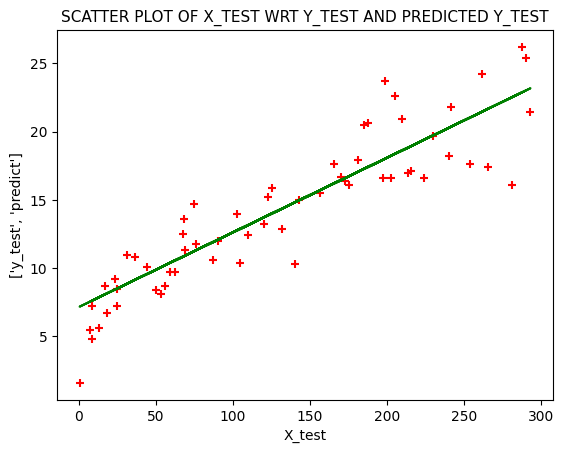

In [57]:
mp.scatter(X_test,y_test,marker='+',color='r')
mp.plot(X_test,predict,color='g')
mp.xlabel('X_test',fontsize=10)
mp.ylabel(['y_test','predict'])
mp.title('SCATTER PLOT OF X_TEST WRT Y_TEST AND PREDICTED Y_TEST',fontsize=11)

**Conclusion: The regression coefficients indicate that each unit increase in TV advertising spend is associated with a substantial increase in sales.
            Radio and Newspaper spends had comparatively lower impacts on sales, as indicated by their smaller coefficients and lower correlation with sales.
            With an 𝑅2 score of 0.757, the model demonstrates a high degree of accuracy in explaining the variability in sales.**